In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

In [2]:
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 128
max_epochs = 50
filters = [32,32,16]

In [3]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

x_train = np.reshape(x_train, (len(x_train),28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise = 0.5
x_train_noisy = x_train + noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

x_train_noisy = x_train_noisy.astype('float32')
x_test_noisy = x_test_noisy.astype('float32')

print(x_test_noisy[1].dtype)

float32


In [4]:
class Encoder(K.layers.Layer):
    def __init__(self, filters):
        super(Encoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.pool = MaxPooling2D((2, 2), padding='same')
 
    def call(self, input_features):
        x = self.conv1(input_features)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.pool(x)
        return x

In [5]:
class Decoder(K.layers.Layer):
    def __init__(self, filters):
        super(Decoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='valid')
        self.conv4 = Conv2D(1, 3, 1, activation='sigmoid', padding='same')
        self.upsample = UpSampling2D((2, 2))
  
    def call(self, encoded):
        x = self.conv1(encoded)
        x = self.upsample(x)
        x = self.conv2(x)
        x = self.upsample(x)
        x = self.conv3(x)
        x = self.upsample(x)
        return self.conv4(x)

In [6]:
class Autoencoder(K.Model):
    def __init__(self, filters):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(filters)
        self.decoder = Decoder(filters)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [7]:
model = Autoencoder(filters)

model.compile(loss='binary_crossentropy', optimizer='adam')

loss = model.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=max_epochs,
                batch_size=batch_size)

(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
59648/60000 [============================>.] - ETA: 0s - loss: 0.2076(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2073 - val_loss: 0.1516
Epoch 2/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1411 - val_loss: 0.1320
Epoch 3/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1282 - val_loss: 0.1246
Epoch 4/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1221 - val_loss: 0.1193
Epoch 5/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1182 - val_loss: 0.1155
Epoch 6/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1154 - val_loss: 0.1128
Epoch 7/50
60000/60000 [===

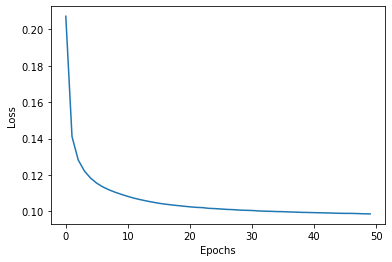

In [8]:
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 16)
(10000, 28, 28, 1)


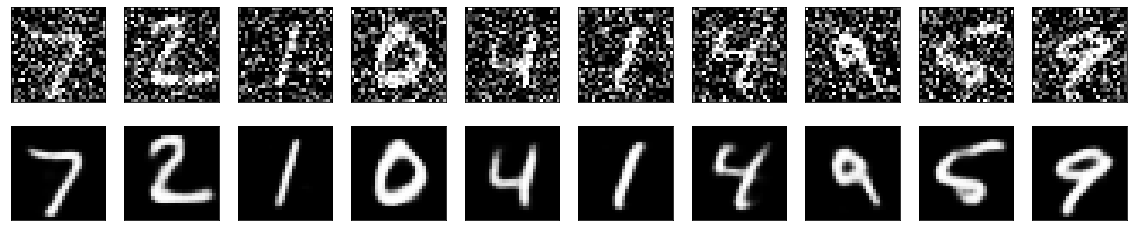

In [9]:
number = 10 
plt.figure(figsize=(20, 4))

for index in range(number):
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(tf.reshape(model(x_test_noisy)[index], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()